# This notebook is an exercise in data analysis.

### The data under analysis is the Kaggle Titanic dataset. Questions will be asked about a what attributes of a person predict their chances of surviving the accident.

In [1]:
import pandas as pd
from visuals import plot_survivors_deceased

In [2]:
from IPython.display import Markdown as md

## The variables relevant to the analysis:

In [3]:
fields = ['Survived', 'Pclass', 'Sex', 'Age','SibSp',
          'Parch', 'Fare', 'Cabin', 'Embarked']

In [4]:
df = pd.read_csv('./train.csv',usecols=fields)

## The sinking of the Titanic was a deadly event. 

In [5]:
total_people = len(df)

In [6]:
survived = df.loc[df["Survived"]==1]
total_survivors = len(survived)
prob_survived = total_survivors/total_people

In [7]:
perished = df.loc[df["Survived"]==0]
total_perished = len(perished)
prob_deceased = total_perished/total_people

In [8]:
print("{:.2f}% survived. {:.2f}% perished".\
      format(prob_survived*100,prob_deceased*100))

38.38% survived. 61.62% perished


### You were more likely to perish on the Titanic than to survive.

$$P(Survived) = 38.38\%$$

$$P(Deceased) = 61.62\%$$

## What is the effect of gender on chances of survival?

In [9]:
prob_male = len(df.loc[df["Sex"]==\
                    "male"])/total_people

prob_female = len(df.loc[df["Sex"]==\
                    "female"])/total_people

In [10]:
print("{:.2f}% of the passengers are female. {:.2f}% are male".\
      format(prob_female*100,prob_male*100))

35.24% of the passengers are female. 64.76% are male


You were more likely to come across a male on the Titanic that day.

$$P(Female) = 35.24\%$$

$$P(Male)= 64.76\%$$

In [11]:
female_survivors = len(survived.loc[survived["Sex"]=="female"])
male_survivors = len(survived.loc[survived["Sex"]=="male"])

In [12]:
prob_female_survived = female_survivors/total_survivors
prob_male_survived = male_survivors/total_survivors

print("{:.2f}% of survivors are female. {:.2f}% of survivors are male"\
      .format(prob_female_survived*100,prob_male_survived*100))

68.13% of survivors are female. 31.87% of survivors are male


It can be seen that the probability that a survivor is female is 68.13%.

$$P(Female | Survived) = 68.13\%$$

The probability that a survivor is male is 31.87%.

$$P(Male | Survived) = 31.87\%$$

In [13]:
female_deceased = len(perished.loc[perished["Sex"]=="female"])
male_deceased = len(perished.loc[perished["Sex"]=="male"])

In [14]:
prob_female_deceased = female_deceased/total_perished
prob_male_deceased = male_deceased/total_perished

print("{:.2f}% of the deceased are female. {:.2f}% of the \
deceased are male".format(prob_female_deceased*100,prob_male_deceased*100))

14.75% of the deceased are female. 85.25% of the deceased are male


It can be seen that the probability that the person deceased is female is 14.75%.

$$P(Female | Deceased) = 14.75\%$$

The probability that the person deceased is male is 85.25%.

$$P(Male | Deceased) = 85.25\%$$

## Using Bayes' Theorem, you can now calculate the probability that a person survived or died given their gender by making use of the probabilities calculated above:

$$P(Survived) = 38.38\%$$

$$P(Deceased) = 61.62\%$$

$$P(Female) = 35.24\%$$ 

$$P(Male)= 64.76\%$$

$$P(Female | Survived) = 68.13\%$$

$$P(Male | Survived) = 31.87\%$$

$$P(Female | Deceased) = 14.75\%$$

$$P(Male | Deceased) = 85.25\%$$

## The probabilities of surviving or dying with respect to gender are as follows:



### Probability of survival given the person is female is:


$$P(Survived | Female) = \dfrac{P(Female|Survived)\cdot P(Survived)}{P(Female)} = \dfrac{0.6813 \cdot 0.3838}{0.3524} = 74.20\%$$

In [15]:
prob_survived_female = (prob_female_survived*prob_survived)/prob_female
print("{:.2f}%".format(prob_survived_female*100))

74.20%


### Probability of being deceased given the person is female is:

$$P(Deceased | Female) = \dfrac{P(Female|Deceased)\cdot P(Deceased)}{P(Female)} = \dfrac{0.1475 \cdot 0.6162}{0.3524} = 25.80\%$$

In [16]:
prob_deceased_female = (prob_female_deceased*prob_deceased)/prob_female
print("{:.2f}%".format(prob_deceased_female*100))

25.80%


### Probability of survival given the person is male is:

$$P(Survived | Male) = \dfrac{P(Male|Survived)\cdot P(Survived)}{P(Male)} = \dfrac{0.3187 \cdot 0.3838}{0.6476} = 18.89\%$$

In [17]:
prob_survived_male = (prob_male_survived*prob_survived)/prob_male
print("{:.2f}%".format(prob_survived_male*100))

18.89%


### Probability of being deceased given the person is male is:

$$P(Deceased | Male) = \dfrac{P(Male|Deceased)\cdot P(Deceased)}{P(Male)} = \dfrac{0.8525 \cdot 0.3838}{0.6476}= 81.11\%$$

In [18]:
prob_deceased_male = (prob_male_deceased*prob_deceased)/prob_male
print("{:.2f}%".format(prob_deceased_male*100))

81.11%


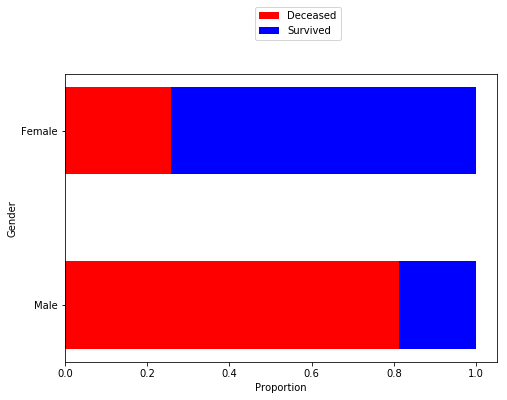

In [19]:
survival_chances = (prob_survived_male,prob_survived_female)
deceased_chances = (prob_deceased_male,prob_deceased_female)
classes = 2
width = 0.5
class_labels = ("Male","Female")
variable = "Gender"

plot_survivors_deceased(survival_chances, deceased_chances, classes, width, class_labels,variable)

## It can be concluded that gender has an effect surviving the sinking of the Titanic.

# Does the class you were in have an effect on whether you lived or died?

### Probabilities in this section are rounded to three decimal places for readability. As, due to  unfortunate rounding errors, rounding probabilities to two decimal places result in probabilities that do not add up to 1. Which seemingly breaks the law of total probability (unforgivable to mathematicians).  Rest assured, the full precision probabilities in this notebook add up to 1 for their respective partitions. So the law of total probability is not broken. This is for the mathematicians.

In [20]:
prob_1st = len(df.loc[df["Pclass"] == 1])/total_people
prob_2nd = len(df.loc[df["Pclass"] == 2])/total_people
prob_3rd = len(df.loc[df["Pclass"] == 3])/total_people

print("{:.3f}% of passengers were first class. \n\
{:.3f}% of passengers were in second class. \n\
{:.3f}% of passengers were in third class.".format(prob_1st*100,prob_2nd*100,prob_3rd*100))

24.242% of passengers were first class. 
20.651% of passengers were in second class. 
55.107% of passengers were in third class.


Upper class people acounted for $\approx$ a quarter of the people on the ship.

$$P(1^{st}) = 24.242\%$$

Middle class people acounted for $\approx$ a fifth of the people on the ship.

$$P(2^{nd}) = 20.651\%$$


Lower class people accounted for $\approx$ half of the people on the ship.

$$P(3^{rd}) = 55.107\%$$

In [21]:
prob_1st_survived = len(survived.loc[survived["Pclass"] == 1])/total_survivors
prob_2nd_survived = len(survived.loc[survived["Pclass"] == 2])/total_survivors
prob_3rd_survived = len(survived.loc[survived["Pclass"] == 3])/total_survivors

print("{:.3f}% of the survivors were in first class. \n\
{:.3f}% of the survivors were in second class. \n\
{:.3f}% of the survivors were in third class.".format(prob_1st_survived*100,\
                                                       prob_2nd_survived*100,\
                                                       prob_3rd_survived*100))

39.766% of the survivors were in first class. 
25.439% of the survivors were in second class. 
34.795% of the survivors were in third class.


### It was almost equally likely to come across a survivor in any class

$$P(1^{st} | Survived) = 39.766\%$$

$$P(2^{nd} | Survived) = 25.439\%$$

$$P(1^{st} | Survived) = 34.795\%$$

In [22]:
prob_1st_deceased = len(perished.loc[perished["Pclass"] == 1])/total_perished
prob_2nd_deceased = len(perished.loc[perished["Pclass"] == 2])/total_perished
prob_3rd_deceased = len(perished.loc[perished["Pclass"] == 3])/total_perished

print("{:.3f}% of the deceased were in first class. \n\
{:.3f}% of the deceased were in second class. \n\
{:.3f}% of the deceased were in third class.".format(prob_1st_deceased*100,\
                                                       prob_2nd_deceased*100,\
                                                       prob_3rd_deceased*100))

14.572% of the deceased were in first class. 
17.668% of the deceased were in second class. 
67.760% of the deceased were in third class.


### The majority of the deceased were in the lower class

$$P(1^{st} | Deceased) = 14.572\%$$

$$P(2^{nd} | Deceased) = 17.668\%$$

$$P(3^{rd} | Deceased) = 67.760\%$$

In [23]:
print("{:.3f}% survived. {:.3f}% perished.".format(prob_survived*100,prob_deceased*100))

38.384% survived. 61.616% perished.


## Once again, using Bayes' Theorem, the probability that someone survived or perished given their class can be calculated with the following values:

$$P(Survived) = 38.384\%$$

$$P(Deceased) = 61.616\%$$

$$P(1^{st}) = 24.242\%$$

$$P(2^{nd}) = 20.651\%$$

$$P(3^{rd}) = 55.107\%$$

$$P(1^{st} | Survived) = 39.766\%$$

$$P(2^{nd} | Survived) = 25.439\%$$

$$P(1^{st} | Survived) = 34.795\%$$

$$P(1^{st} | Deceased) = 14.572\%$$

$$P(2^{nd} | Deceased) = 17.668\%$$

$$P(3^{rd} | Deceased) = 67.760\%$$

### Probability of survival given a person is in 1$^{st}$ class:

$$P(Survived | 1^{st}) = \dfrac{P(1^{st} | Survived)\cdot P(Survived)}{P(1^{st})} = \dfrac{0.39766 \cdot 0.38384}{0.24242} = 62.963\%$$

In [24]:
prob_survived_1st = (prob_1st_survived*prob_survived)/prob_1st
print("{:.3f}%".format(prob_survived_1st * 100))

62.963%


### Probability of deceased given a person is in 1$^{st}$ class:

$$P(Deceased | 1^{st}) = \dfrac{P(1^{st} | Deceased)\cdot P(Deceased)}{P(1^{st})} = \dfrac{0.14572 \cdot 0.61616}{0.24242} = 37.037\%$$

In [25]:
prob_deceased_1st = (prob_1st_deceased*prob_deceased)/prob_1st
print("{:.3f}%".format(prob_deceased_1st * 100))

37.037%


### Probability of survival given a person is in 2$^{nd}$ class:

$$P(Survived | 2^{nd}) = \dfrac{P(2^{nd} | Survived)\cdot P(Survived)}{P(2^{nd})} = \dfrac{0.25439 \cdot 0.38384}{0.20651} = 47.283\%$$

In [26]:
prob_survived_2nd = (prob_2nd_survived*prob_survived)/prob_2nd
print("{:.3f}%".format(prob_survived_2nd * 100))

47.283%


### Probability of deceased given a person is in 2$^{nd}$ class:

$$P(Deceased | 2^{nd}) = \dfrac{P(2^{nd} | Deceased)\cdot P(Deceased)}{P(2^{nd})} = \dfrac{0.17668 \cdot 0.61616}{0.20651} = 52.717\%$$

In [27]:
prob_deceased_2nd = (prob_2nd_deceased*prob_deceased)/prob_2nd
print("{:.3f}%".format(prob_deceased_2nd * 100))

52.717%


### Probability of survival given a person is in 3$^{rd}$ class:

$$P(Survived | 3^{rd}) = \dfrac{P(3^{rd} | Survived)\cdot P(Survived)}{P(3^{rd})} = \dfrac{0.25439 \cdot 0.38384}{0.55107} = 24.236\%$$

In [28]:
prob_survived_3rd = (prob_3rd_survived*prob_survived)/prob_3rd
print("{:.3f}%".format(prob_survived_3rd * 100))

24.236%


### Probability of deceased given a person is in 3$^{rd}$ class:

$$P(Deceased | 3^{rd}) = \dfrac{P(3^{rd} | Deceased)\cdot P(Deceased)}{P(3^{rd})} = \dfrac{0.67760 \cdot 0.61616}{0.55107} = 75.764\%$$

In [29]:
prob_deceased_3rd = (prob_3rd_deceased*prob_deceased)/prob_3rd
print("{:.3f}%".format(prob_deceased_3rd * 100))

75.764%


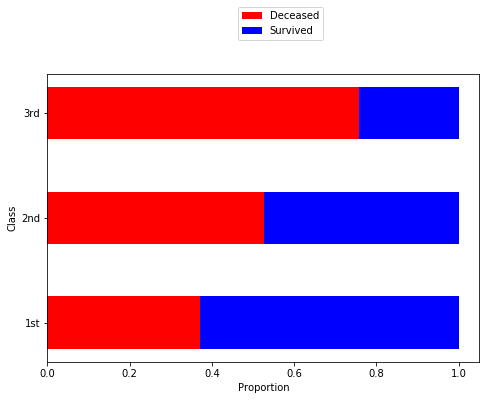

In [31]:
survival_chances = (prob_survived_1st,prob_survived_2nd,prob_survived_3rd)
deceased_chances = (prob_deceased_1st,prob_deceased_2nd,prob_deceased_3rd)
classes = 3
width = 0.35
tick_labels = ("1st","2nd","3rd")
variable = "Class"

plot_survivors_deceased(survival_chances, deceased_chances, classes, width, tick_labels, variable)

# The data shows that the more upper class you were, the more likely you were to survive. Class has an effect on a person's chances of survival.